In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
runtime_analysis_path = "/home/brett/work/TrajectoryInference/SNPBarcodingSimulator/simulation/analysis/qsub_outfiles/simulation_runtime.csv"

In [4]:
df = pd.read_csv(runtime_analysis_path)
print(df.head())

         label        id         start_time           end_time
0  bkSNP_Lv100  51152027  20220425-15:23:23  20220425-23:21:54
1  bkSNP_Lv100  51152028  20220425-15:23:23  20220425-21:48:42
2  bkSNP_Lv100  51152029  20220425-15:23:23  20220425-22:13:55
3   bkSNP_Lv10  51151881  20220425-15:20:16  20220425-15:32:19
4   bkSNP_Lv10  51151882  20220425-15:20:16  20220425-15:30:24


In [5]:
df[df["label"] == "bkSNP_Lv200"]

,label,id,start_time,end_time
18,bkSNP_Lv200,51159016,20220426-04:02:02,20220427-06:58:40
19,bkSNP_Lv200,51159026,20220426-04:02:33,20220427-06:14:33
20,bkSNP_Lv200,51159035,20220426-04:02:33,20220427-06:05:07


In [7]:
num_embryos = np.array([int(label.split("bkSNP_Lv")[1]) for label in df["label"]])
start_times = []
for entry in df["start_time"]:
    date,time = entry.split("-")
    day = date.split("202204")[1]
    hour,minute,seconds = time.split(":")
    seconds = int(seconds)
    seconds += int(minute)*60
    seconds += int(hour)*60*60
    seconds += int(day)*24*60*60
    start_times.append(seconds)
    
    
end_times = []
for entry in df["end_time"]:
    date,time = entry.split("-")
    day = date.split("202204")[1]
    hour,minute,seconds = time.split(":")
    seconds = int(seconds)
    seconds += int(minute)*60
    seconds += int(hour)*60*60
    seconds += int(day)*24*60*60
    end_times.append(seconds)

time_elapsed = np.subtract(end_times,start_times)/60/60 # in hours

print(len(num_embryos),len(time_elapsed))
idx_to_filter = [i for i in range(len(time_elapsed)) if time_elapsed[i] < 0]
num_embryos = np.delete(num_embryos,idx_to_filter)
time_elapsed = np.delete(time_elapsed,idx_to_filter)
print(len(num_embryos),len(time_elapsed))

153 153
153 153


In [9]:
runtime_200embryos = []
for i in range(len(num_embryos)):
    if num_embryos[i] == 200:
        runtime_200embryos.append(time_elapsed[i])
print(np.mean(runtime_200embryos))

26.395555555555557


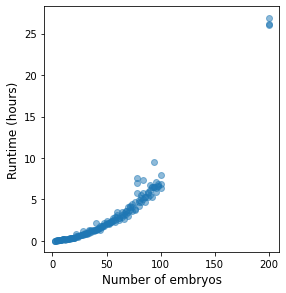

In [11]:
fig,ax = plt.subplots(figsize=(4,4))
plt.tight_layout()
plt.plot(num_embryos, time_elapsed, 'o', alpha = 0.5)
plt.xlabel("Number of embryos", fontsize=12)
plt.ylabel("Runtime (hours)", fontsize=12)
# fig.savefig("/home/brett/work/TrajectoryInference/SNPBarcodingSimulator/figs/simulation_runtime.eps", format='eps', bbox_inches='tight')
plt.show()